# Reading, cleaning and scaling:

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing

def fullRead(pathToTable, sep, anthro = False):

  df_renamed = pd.read_csv(pathToTable, sep = sep, encoding = "latin_1")


  # reading and merging    
  
  if anthro == True:
    df_anthro = pd.read_csv("../data/chronicAnthropometricCardiovascularData.csv", sep=";", decimal=",")
    df_renamed = df_renamed.merge(df_anthro)

    # separating by time moment and renaming

    df_renamed["Weight"] = ""
    df_renamed["BMI"] = ""
    df_renamed["Fat"] = ""
    df_renamed["CVRI"] = ""
    df_renamed["Bpmin"] = ""
    df_renamed["Bpmax"] = ""
    df_renamed["Frec"] = ""

    for i in range(len(df_renamed)):

        if df_renamed.loc[i]["Time"] == "Initial":
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso inicial"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Inicial"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa inicial"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV inicial"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin inicial"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax inicial"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec inicial"] 
                
        if df_renamed.loc[i]["Time"] == "Final":
        
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso final"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Final"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa final"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV Final"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin final"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax final"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec final"] 
        
    df_renamed.drop(columns = ["Peso inicial", "Peso final", "Delta Peso", "Talla", "IMC Inicial", "IMC Final", "Delta IMC", "Grasa inicial", "Grasa final", "Delta Grasa", "IRCV Final", "IRCV inicial", "Bpmin final", "Bpmin inicial", "Bpmax final", "Bpmax inicial", "Frec final", "Frec inicial",], inplace=True )
  
  df_renamed.drop(columns = ["Unnamed: 0", "grouping"], inplace=True )
  df_renamed.fillna(0, inplace=True)
  return df_renamed

def scaling(df_read):
   
   scaler = preprocessing.MinMaxScaler()
   numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
   df_read[numCols] = scaler.fit_transform(df_read[numCols])
   return df_read

df1_anthro = scaling(fullRead("../data/urineAnt_ord.csv",  sep = ",", anthro= True))
df1_metab = scaling(fullRead("../data/urineAnt_ord.csv",  sep = ",", anthro= False))

C:\Users\Cristina García\AppData\Local\Temp\ipykernel_14252\3288014997.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\Cristina García\AppData\Local\Temp\ipykernel_14252\3288014997.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns


# Spliting and encoding

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

metabs = ['CA', 'CA.G', 'CA.S', 'CA.GS', 'Total.CA', 'DHPAA', 'DHPAA.G',
       'DHPAA.GG', 'DHPAA.GS', 'DHPAA.SS', 'Total.DHPAA', 'TFA.G', 'TFA.S',
       'TFA.di.sulfate.1', 'Total.TFA', 'TIFA.Sulfate.1', 'VA', 'VA.GG',
       'VA.GS', 'VA.SS', 'Total.VA']
anthro = ['Weight','BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec']
factors = ['Sweetener', 'Time', 'Sex']
enc = OrdinalEncoder()
enc.fit(df1_anthro[factors])
df1_anthro[factors] = enc.transform(df1_anthro[factors])

X, y = df1_anthro[df1_anthro["Time"] == "Initial"].drop(["numVol", "Time"], axis=1), df1_anthro[df1_anthro["Time"] == "Final"].drop(['Time','numVol', 'Sweetener', 'Time', 'Sex', 'Weight','BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'], axis =1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
df1_anthro = scaling(fullRead("../data/urineFlav_ord.csv",  sep = ",", anthro= True))
df1_anthro.columns

C:\Users\Cristina García\AppData\Local\Temp\ipykernel_14252\3288014997.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns


Index(['numVol', 'E', 'EG.1', 'E.S', 'Total.E', 'HE', 'HE.G', 'HE.GG',
       'Total.HE', 'N', 'N.G', 'N.GG', 'N.S', 'Total.N', 'Sweetener', 'Time',
       'Sex', 'Weight', 'BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')

# Building model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# define model
model = RandomForestRegressor()

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


# Building dataframe of importances

In [7]:
df_importance = pd.DataFrame(columns = y_train.columns, index = X_train.columns)
for i in range(len(y_train.columns)):
    df_importance[y_train.columns[i]] = best_grid.estimators_[i].feature_importances_ 

df_importance


,CA,CA.G,CA.S,CA.GS,Total.CA,DHPAA,DHPAA.G,DHPAA.GG,DHPAA.GS,DHPAA.SS,...,TFA.G,TFA.S,TFA.di.sulfate.1,Total.TFA,TIFA.Sulfate.1,VA,VA.GG,VA.GS,VA.SS,Total.VA
CA,0.000000,0.000000,0.000000,0.000000,0.000000,0.019495,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.091461,0.000000,0.000000,0.000000,0.000000
CA.G,0.000000,0.000000,0.000000,0.000000,0.000000,0.074320,0.000000,0.033432,0.294550,0.000000,...,0.115856,0.000000,0.000000,0.000000,0.000000,0.000000,0.048279,0.000000,0.000000,0.000000
CA.S,0.000000,0.000000,0.222256,0.000000,0.000000,0.080077,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.127393,0.000000,0.000000,0.058501,0.000000,0.000000,0.000000
CA.GS,0.000000,0.000000,0.017546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280521,...,0.115375,0.000000,0.222042,0.000000,0.000000,0.000000,0.000000,0.156716,0.000000,0.000000
Total.CA,0.074422,0.000000,0.000000,0.022537,0.054508,0.000000,0.000000,0.000000,0.058142,0.128629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.140929,0.000000,0.081557,0.000000,0.000000
DHPAA,0.000000,0.000000,0.090616,0.129133,0.000000,0.000000,0.205026,0.000000,0.000000,0.000000,...,0.129822,0.000000,0.000000,0.000000,0.000000,0.154581,0.000000,0.000000,0.000000,0.000000
DHPAA.G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189890,0.000000,0.158095,0.000000,...,0.068950,0.000000,0.108522,0.000000,0.000000,0.000000,0.159516,0.000000,0.308135,0.000000
DHPAA.GG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.151772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DHPAA.GS,0.000000,0.000000,0.091867,0.000000,0.071183,0.000000,0.000000,0.355332,0.171986,0.000000,...,0.000000,0.067916,0.194214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DHPAA.SS,0.152897,0.000000,0.000000,0.000000,0.462538,0.000000,0.000000,0.087985,0.000000,0.000000,...,0.000000,0.000000,0.151270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205316


# General features importances using MDI

Elapsed time to compute the importances: 0.025 seconds


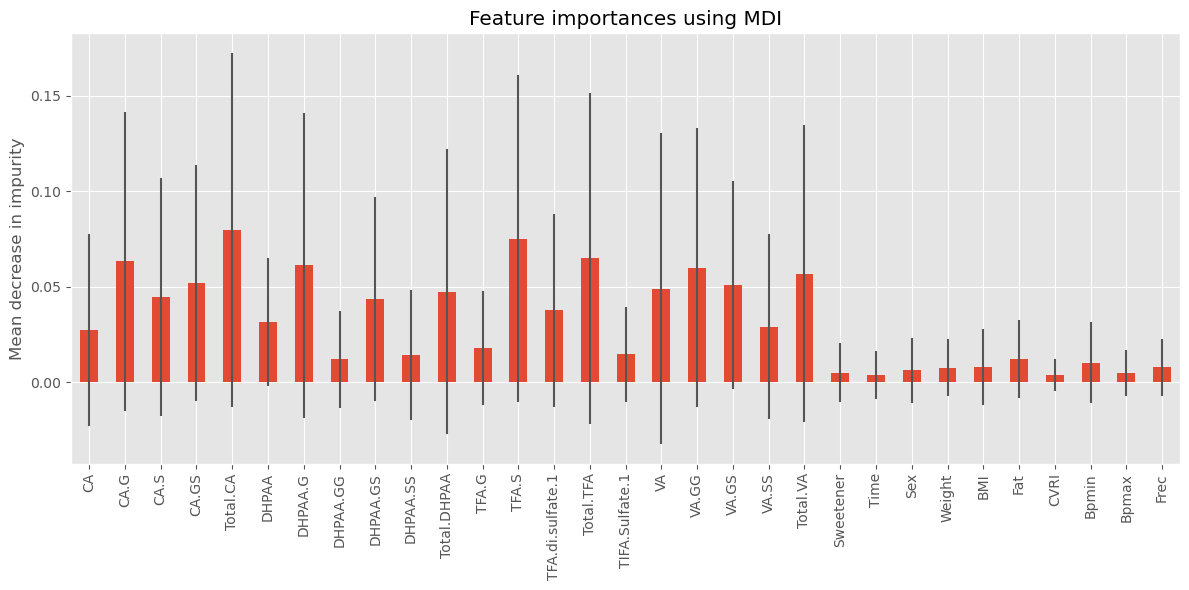

In [24]:
import time

start_time = time.time()
importances = best_grid.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_grid.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Feature importances using permutation on full model

In [115]:
pd.DataFrame(result.importances)


,0,1,2,3,4,5,6,7,8,9
0,0.004708,0.003841,0.005898,0.000562,0.002043,0.002591,0.000653,0.005637,0.001215,0.001619
1,0.001004,-0.001990,-0.001022,0.002034,-0.001704,0.002882,0.003864,0.001391,0.002564,0.000797
2,0.002214,0.004737,0.002076,0.002020,0.003239,0.002176,0.002588,0.003932,0.003587,0.001422
3,-0.000792,-0.000547,-0.000580,-0.000211,-0.001977,0.001996,0.003074,0.003216,0.002488,0.003597
4,-0.005207,-0.003321,-0.000005,0.000689,-0.000450,-0.005046,-0.005352,-0.002617,-0.007112,-0.001124
5,-0.001958,-0.000436,0.002033,0.001066,-0.002739,0.003731,0.002090,0.001519,0.006408,-0.000708
6,0.007005,0.007427,0.001050,0.005459,0.008940,-0.002531,-0.001137,0.006812,-0.003648,0.006882
7,0.001082,0.001521,-0.002117,0.002534,0.000760,-0.001182,-0.000815,-0.000189,0.000777,-0.000536
8,-0.002920,-0.003236,-0.004707,-0.002181,-0.001583,0.001904,0.000805,-0.001635,-0.001675,-0.001809
9,0.002848,0.006069,0.002558,0.003349,-0.001382,0.002596,0.004427,0.003604,0.006238,0.003978


In [100]:
df_importance = pd.DataFrame(columns = y_train.columns, index = X_train.columns)
for i in range(len(y_train.columns)):
    df_importance[y_train.columns[i]] = result["importances"][i]
df_importance

ValueError: Length of values (100) does not match length of index (30)

Elapsed time to compute the importances: 26.451 seconds


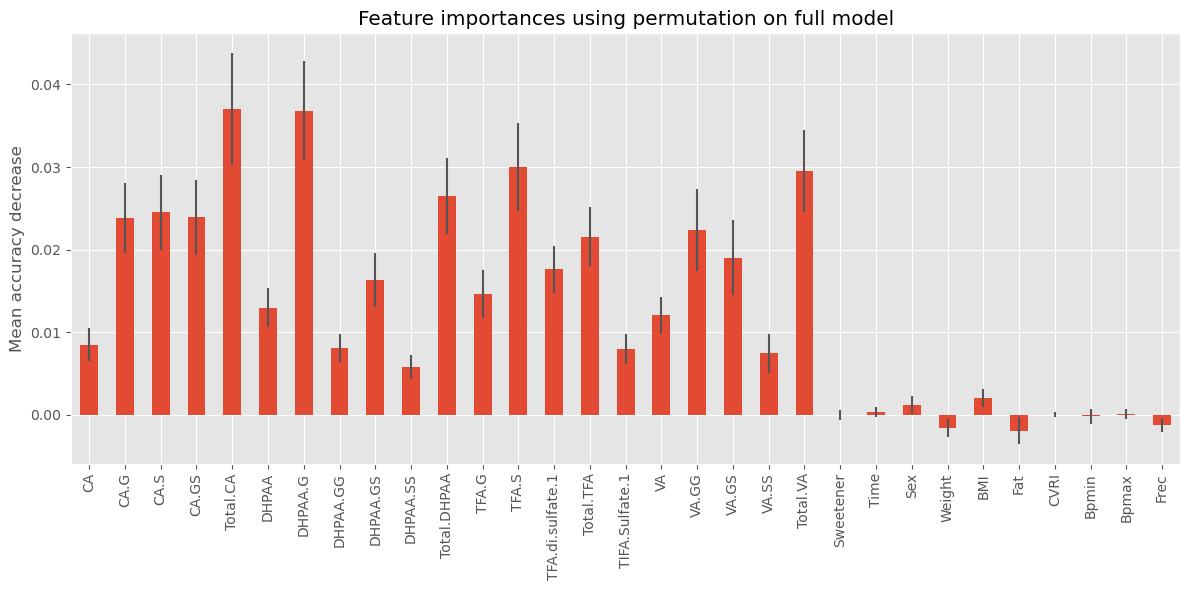

In [25]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    best_grid, X_test, y_test, n_repeats=100, random_state=42, n_jobs=2
)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# From feature importances value, plot for every variable

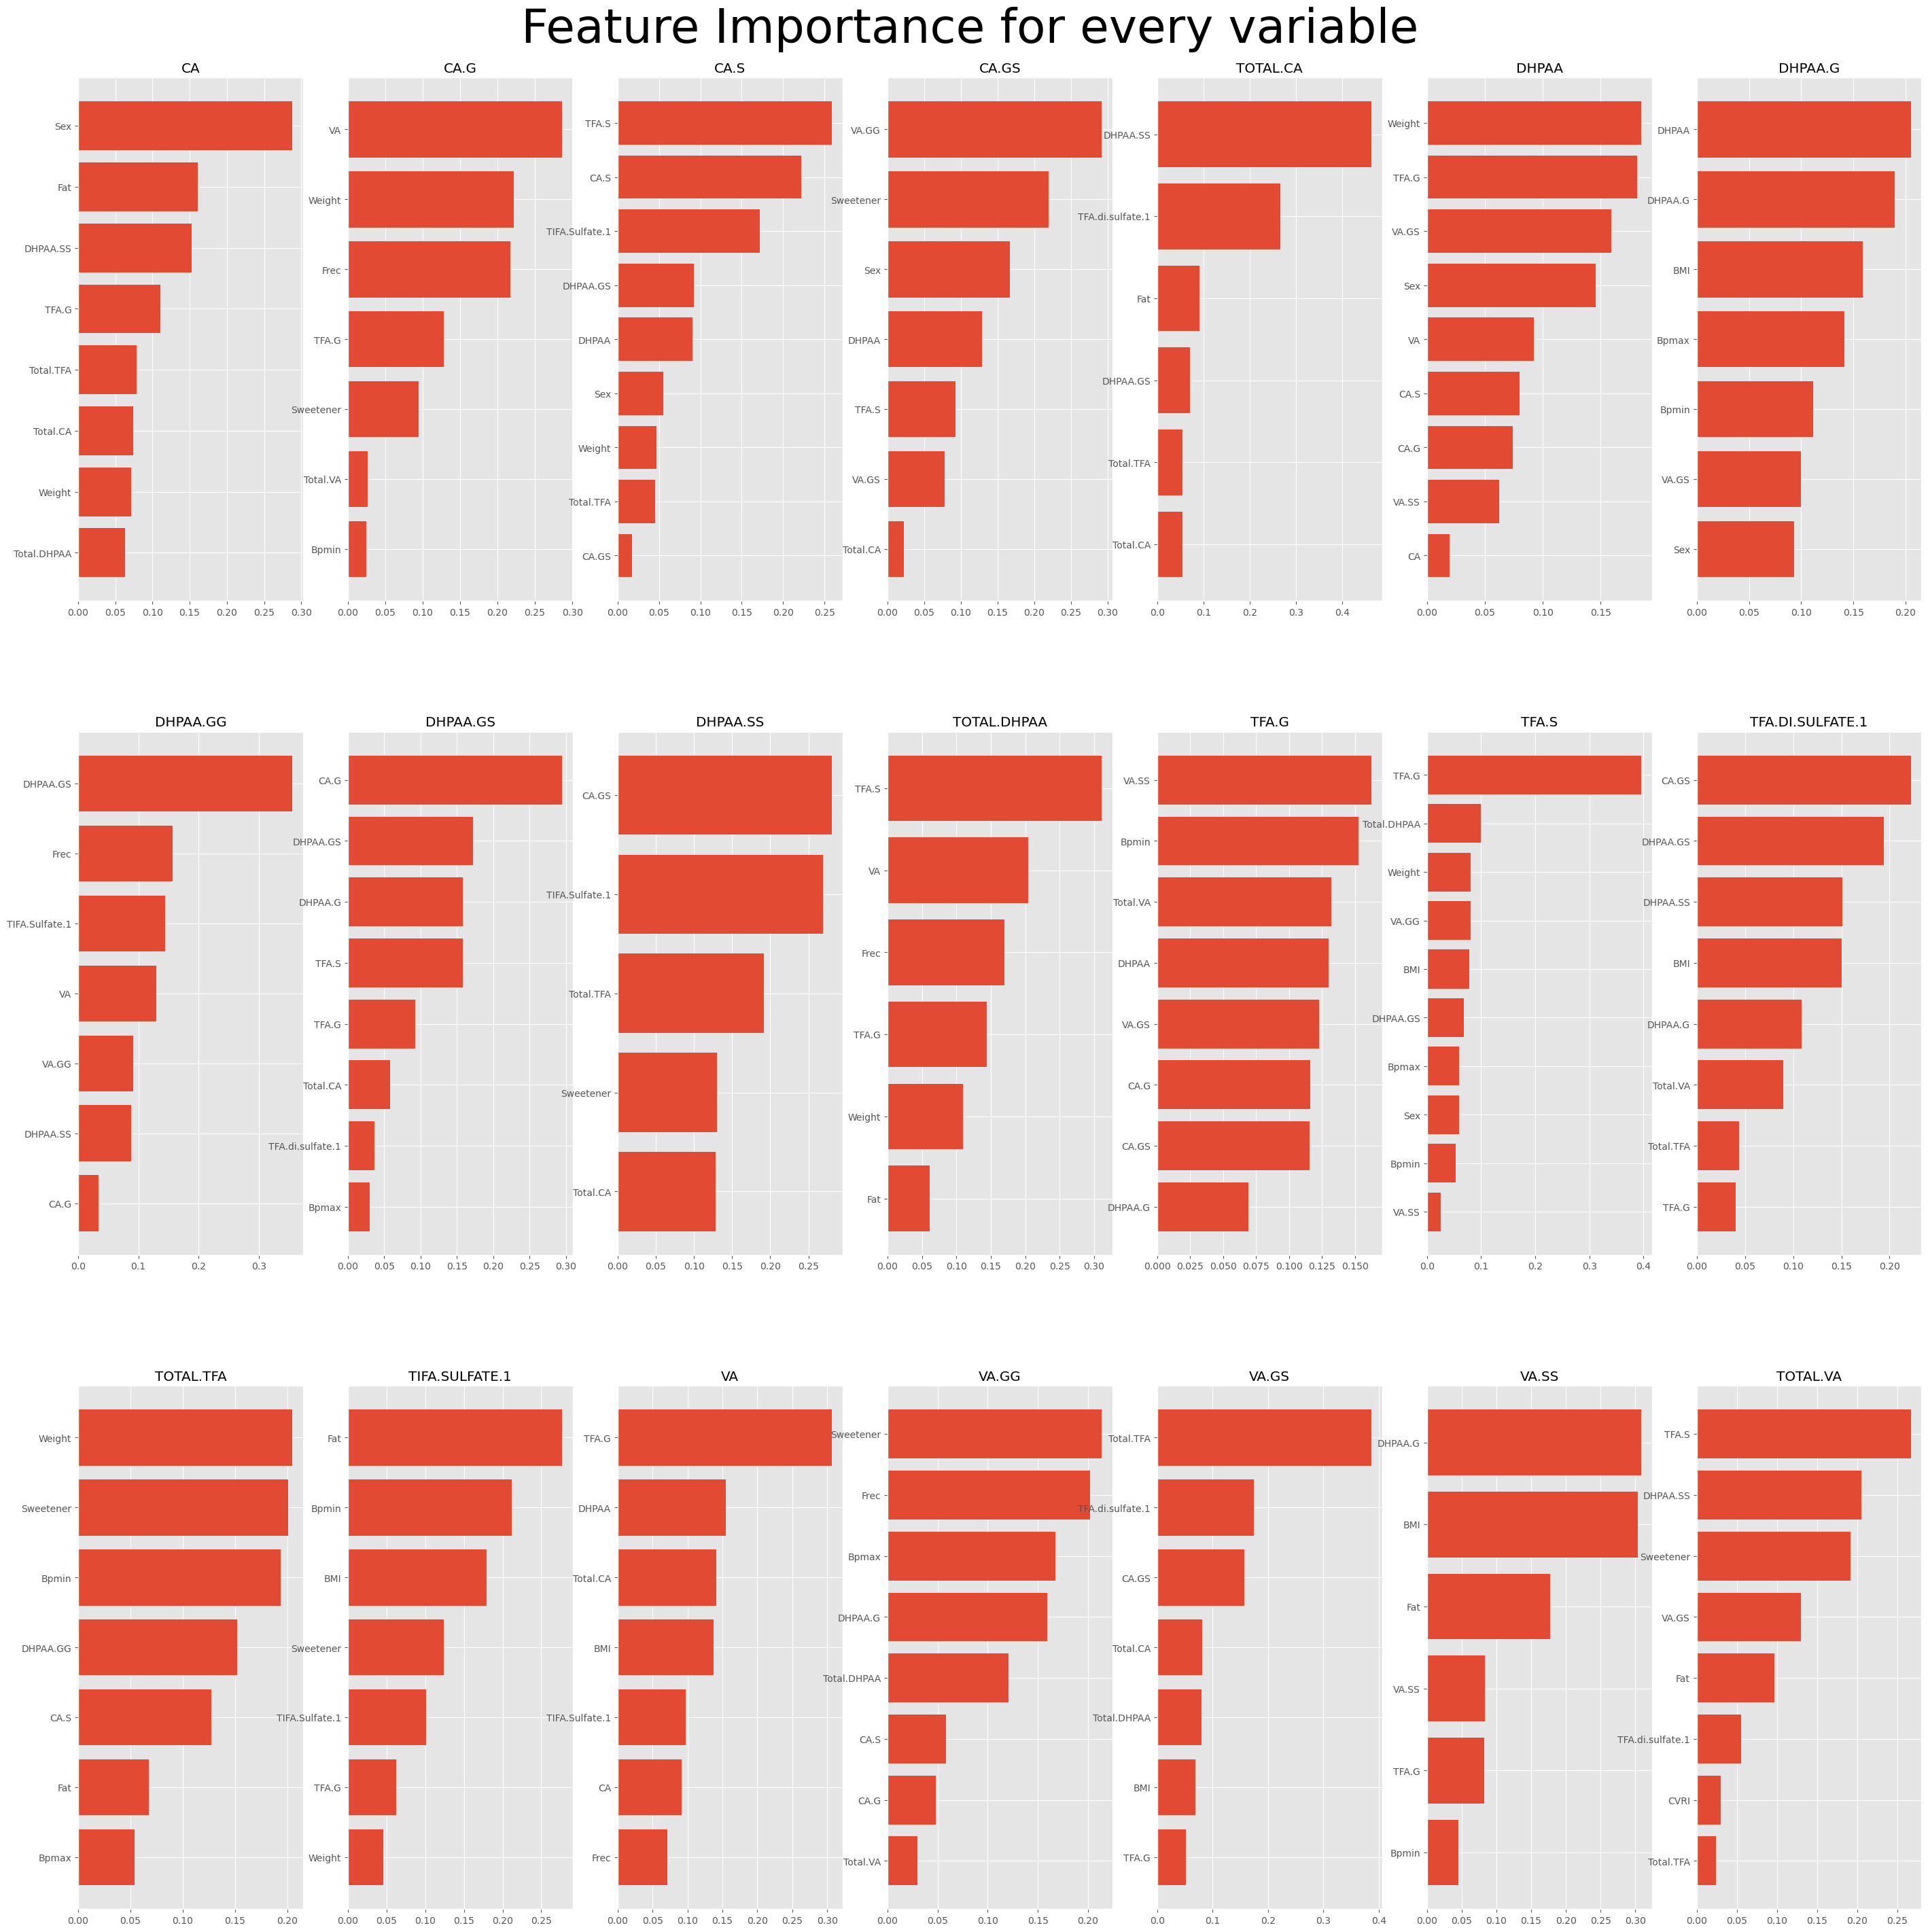

In [128]:
feature_importance = best_grid.estimators_[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(35,35))
plt.subplots_adjust(hspace=0.25)
plt.suptitle("Feature Importance for every variable", y = 0.91, size = 50)


for i,j in zip(range(len(y_train.columns)), range(len(X_train.columns))):
    feature_importance= best_grid.estimators_[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    ax = plt.subplot(3, 7, i+1)
    feature_importance_ordered = feature_importance[sorted_idx]
    feature_importance_no0s = feature_importance_ordered[feature_importance_ordered != 0]
    labels = np.array(X.columns)[sorted_idx]
    labels_no0s = labels[feature_importance_ordered != 0]
    plt.barh(pos[feature_importance_ordered != 0], feature_importance_no0s, align="center")
    plt.yticks(pos[feature_importance_ordered != 0], labels_no0s)
    ax.set_title(y.columns[i].upper())

Trying new stuff: violin and heatmap

<Axes: >

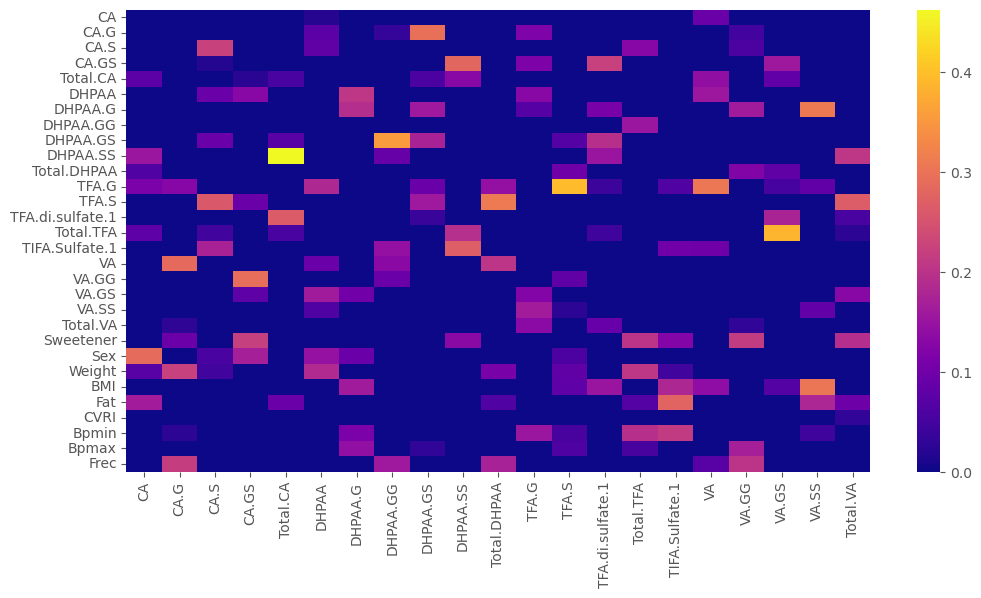

In [20]:
sns.heatmap(df_importance, cmap = 'plasma')


In [12]:
### UTILITY FUNCTIONS TO SUMMARIZE THE EFFECTS OF ALL THE FEATURES ###

def importance_heatmap(
    imp_values, X, n_bins=5
):
    
    imp_values = np.asarray(imp_values)
    sort_cols = np.argsort(np.mean(np.abs(imp_values), axis=0))[::-1]
    imp_values = imp_values[:,sort_cols]
    X = np.asarray(X)
    X = X[:,sort_cols]
    
    count, bins = np.histogram(imp_values, bins=n_bins)
    bins_inds = np.digitize(imp_values, bins[:-1])
    heatmap = np.zeros((imp_values.shape[1], n_bins)) *np.nan

    for c in range(imp_values.shape[1]):

        _ndx = np.argsort(bins_inds[:,c])
        _id, _pos, g_count  = np.unique(bins_inds[_ndx,c], 
                                        return_index=True, 
                                        return_counts=True)
        g_sum = np.add.reduceat(X[_ndx,c], _pos)
        g_mean = g_sum / g_count
        _id -= 1
        
        heatmap[np.ix_([c],_id)] = g_mean
        
        nan = np.isnan(heatmap[c])
        not_nan = np.logical_not(nan)
        interpolated = np.interp(nan.nonzero()[0], not_nan.nonzero()[0], g_mean)
        heatmap[np.ix_([c],nan)] = interpolated
        
    return heatmap, bins, sort_cols

def plot_importance_heatmap(
    imp_values, X, 
    n_bins=5, max_display=20, 
    feat_name=None
):
    
    heatmap, bins, sort_cols = importance_heatmap(imp_values, X, n_bins=n_bins)
    max_display = min(sort_cols.shape[0], max_display)
    heatmap = heatmap[:max_display]
    masks = np.asarray([np.arange(max_display)]*n_bins).T
    null = np.argmin(np.abs(bins))
    
    for m in range(masks.shape[0]):
        plt.imshow(np.ma.masked_array(heatmap, masks != m), cmap='plasma')
    
    if feat_name is None:
        feat_name = [f"feat_{c}" for c in sort_cols]
    else:
        feat_name = [feat_name[c] for c in sort_cols]
    
    plt.yticks(range(max_display), feat_name[:max_display])
    plt.colorbar(ticks=[-1], aspect=50, label='Feature values')
    plt.axvline(null, c='lime', linestyle='--')
    plt.xticks([0, null, n_bins-1], ['negative', 'null', 'positive'])
    plt.ylabel('Features (sorted by importance)')
    plt.xlabel('Permutation values (impact on model output)')

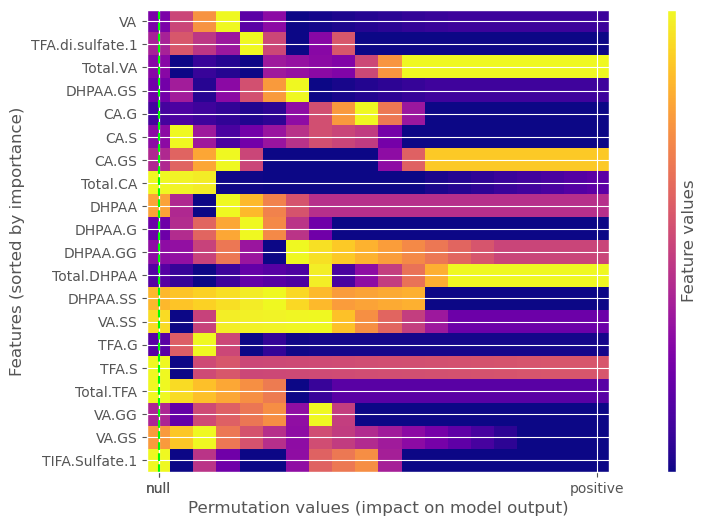

In [16]:
plt.figure(figsize=(15,6))
plot_importance_heatmap(df_importance, X, n_bins=20, feat_name=df_importance.columns)

# Trying permutation

In [39]:
from tqdm import tqdm

from sklearn.linear_model import *

def permut_sample_importance(
    model, X, y, 
    loss_fun, n_repeats=10,
    alpha=None, seed=None, columns_name=None
):
    
    X = np.asarray(X)
    assert X.ndim == 2
    
    y = np.asarray(y)
    assert y.ndim <= 2
    
    if alpha is not None:
        assert alpha > 0 and alpha < 1
        
    if seed is not None:
        np.random.seed(seed)
        
    if columns_name is not None:
        assert len(columns_name) == X.shape[-1]
    else:
        columns_name = np.arange(X.shape[-1])
    
    dist_error = loss_fun(model, X, y, normalize=False)
    sample_imp = {}
    
    for col in tqdm(range(X.shape[-1])):
        
        _importance = []
        for _ in range(n_repeats):
        
            _X = np.copy(X)
            _X[:,col] = np.random.permutation(_X[:,col])
            dist_error_perm = loss_fun(model, _X, y, normalize=False)
            _importance.append(dist_error_perm - dist_error)
        
        if alpha is None:
            sample_imp[columns_name[col]] = np.quantile(
                np.asarray(_importance), 
                q = 0.5, axis = 0)
        else:
            sample_imp[columns_name[col]] = np.quantile(
                np.asarray(_importance), 
                q = [alpha/2, 0.5, 1-alpha/2], axis = 0).T
            
    return sample_imp


def permut_features_importance(
    model, X, y, 
    loss_fun, n_repeats=10,
    seed=None, columns_name=None
):
    
    X = np.asarray(X)
    assert X.ndim == 2
    
    y = np.asarray(y)
    assert y.ndim <= 2
    
    if seed is not None:
        np.random.seed(seed)
    
    if columns_name is not None:
        assert len(columns_name) == X.shape[-1]
    else:
        columns_name = np.arange(X.shape[-1])
        
    error = loss_fun(model, X, y)
    features_imp = {}
    std_features_imp = {}     
        
    for col in tqdm(range(X.shape[-1])):
        
        _importance = []
        for _ in range(n_repeats):
            
            _X = np.copy(X)
            _X[:,col] = np.random.permutation(_X[:,col])
            _importance.append(loss_fun(model, _X, y) - error)
                
        features_imp[columns_name[col]] = np.mean(_importance)
        std_features_imp[columns_name[col]] = np.std(_importance)
                
    return features_imp, std_features_imp

def mse(model, X, true, normalize=True): 
    
    if normalize:
        return np.mean(np.square(true - model.predict(X)))
    else:
        return np.square(true - model.predict(X)) 


def crossentropy(model, X, true, normalize=True):
    
    def _entropy(true, pred): return -(true * np.log(pred))
    
    true = np.asarray(true)
    classes = np.unique(true)
    pred_proba = model.predict_proba(X)
    pred_proba = pred_proba.clip(1e-5, 1 - 1e-5)
    
    c_entropy = np.zeros_like(true, dtype='float64')
    for c,cls in enumerate(classes):
        true_cls = (true == cls).astype(int)
        c_entropy += _entropy(true_cls, pred_proba[:,c])
    
    if normalize:
        return c_entropy.mean()
    else:
        return c_entropy



In [34]:
feat_imp_diz = permut_features_importance(best_grid, X, y, loss_fun=mse, n_repeats=100, 
                                           columns_name=X.columns, seed=42)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  0%|          | 0/30 [00:00<?, ?it/s]c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\li

Text(0, 0.5, 'importance')

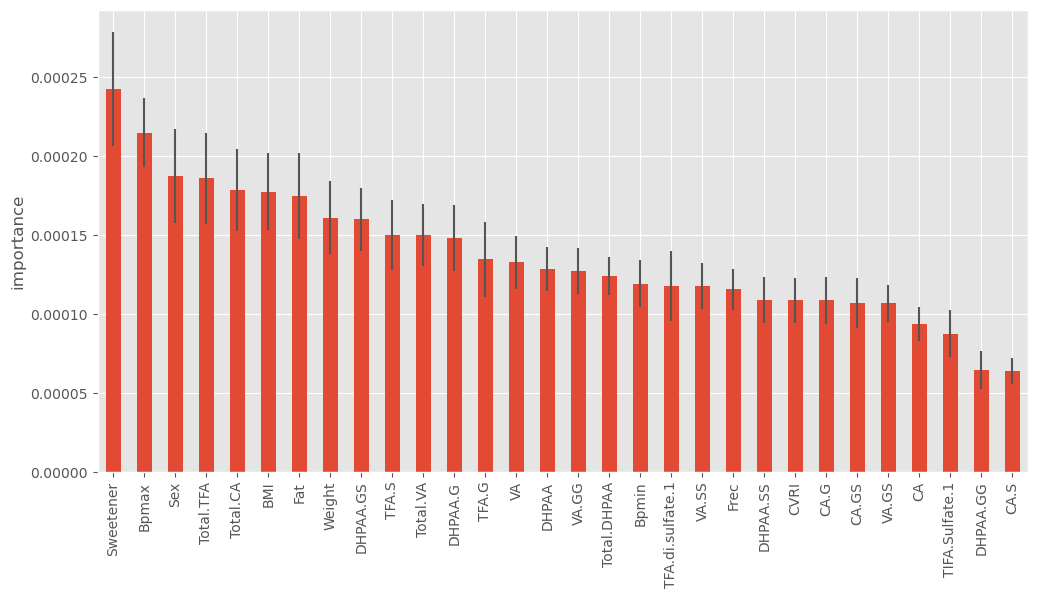

In [36]:
feat_imp_mean, feat_imp_std = feat_imp_diz

feat_imp_mean = pd.Series(feat_imp_mean)
feat_imp_std = pd.Series(feat_imp_std)

order = feat_imp_mean.sort_values(ascending=False).index
feat_imp_mean = feat_imp_mean[order]
feat_imp_std = feat_imp_std[order]

### PLOT FEATURES PERMUTATION IMPORTANCE ###

feat_imp_mean.plot.bar(yerr=feat_imp_std)
plt.ylabel('importance')

In [41]:
imp_diz = permut_sample_importance(best_grid, X, y, loss_fun=mse, alpha=None, n_repeats=100, 
                                   columns_name=X.columns, seed=42)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  0%|          | 0/30 [00:00<?, ?it/s]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: U

In [93]:
imp_diz["CA"][0], imp_diz["CA"][124] 

(array([ 2.e-06,  8.e-06,  1.e-05, -3.e-04,  4.e-06, -9.e-06, -1.e-04,
         9.e-06, -9.e-05,  6.e-06, -1.e-04,  3.e-07,  4.e-05,  3.e-04,
         4.e-05, -5.e-08,  9.e-06, -1.e-06,  3.e-05,  0.e+00,  3.e-06]),
 array([-7.e-06,  1.e-05,  0.e+00,  4.e-04,  1.e-05,  6.e-05, -2.e-04,
         2.e-06, -2.e-06,  1.e-05, -2.e-04,  2.e-06, -3.e-04,  0.e+00,
        -3.e-04,  2.e-07, -7.e-05, -1.e-05,  1.e-04, -8.e-06, -8.e-05]))

In [88]:
imp_df = pd.DataFrame(columns= y.columns, index = imp_diz.keys())

for c in imp_dz

imp_df = pd.DataFrame({c : imp_diz[c] for c in imp_diz}, columns= y.columns, index = imp_diz.keys())

ValueError: Data must be 1-dimensional